<div>
    <p><b>Username: </b>yaraelzahy</p>
    <p><b>Displayed Name: </b> Yara Elzahy</p>
    <p><b>ID: </b>20398570</p>
</div>

# Speed Dating Competition ⏱️👩🏼‍❤️‍👨

## Questions ❓

#### 🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

| <p style="text-align: left:">Linear Regression</p> | <p style="text-align: right;float:right;">Logistic Regression</p> |
| --- | --- |
| <ul style="text-align: left;float:left;"><li>Linear Regression solves regression problems.</li><li>Linear Regression provides a continuous output.</li><li>Its goal is to determine the line of best fit.</li><li>It uses the mean squared error to calculate the loss function.</li><li>The threshold value shifts when new data points are added.</li></ul> | <ul style="text-align: left;float:left;"><li>Logistic Regression solves classification problems.</li><li>Logistic Regression provides a discrete output.</li><li>It goes one step farther and fits the line values to the sigmoid curve.</li><li>It uses the maximum likelihood estimation to calculate the loss function.</li><li>maintains the value of the threshold even when new data points are added.</li></ul> |

That's why linear regression is not suitable for classification and the above table of camparison justifies the reasons behind using logistic regression instead which steps over these practical problems that hold back linear regression for classification.


#### 🌈 What's a decision tree and how it is different to a logistic regression model?

A decision tree is a non-parametric supervised supervised classifier that is the most powerful tool for classification and regression applications. It is basically a flowchart-like tree structure in which each internal node represents a test on an attribute, each branch represents a test outcome, and each leaf node (terminal node) stores a class label.


**Difference between a decision tree and a logistic regression model:**

| <p style="text-align: left:">Decision Tree</p> | <p style="text-align: right;float:right;">Logistic Regression</p> |
| --- | --- |
| <ul style="text-align: left;float:left;"><li>Easier to understand or interpret.</li><li>Bisects the space into smaller and smaller regions.</li><li>Automatically handles decision making.</li><li>Prone to overfitting.</li><li>Much influenced by noise.</li><li>It is possible to train it on a small training set.</li></ul> | <ul style="text-align: left;float:left;"><li>More difficult to interpret.</li><li>fits a single line to divide the space exactly into two.</li><li>A decision threshold has to be set when making decisions.</li><li>Not Prone to overfitting.</li><li>Resistant to noise.</li><li>It is necessary to have a large enough training set.</li></ul> |


#### 🌈 What's the difference between grid search and random search?

Both are primarily used to tune hyperparameters of any model, however the **difference** is that the **grid search** for the best combination from all hyperparameter combinations, which can be very inefficient and take a **long time to execute**, whereas the **random search** sets up a grid of hyperparameter values and searches for **random combinations** to train the model and score, but it will not find the best hyperparameter combination.

#### 🌈 What's the difference between bayesian search and random search?

Bayesian search is a sequential model-based optimization algorithm that uses the previous iteration's findings to determine the next hyperparameter value, whereas randoms search creates a grid of hyperparameter values and chooses random combinations to train and score the model (provide a statistical distribution for each hyperparameter from which values are sampled). 

In contrast to grid and random search methods, which treat hyperparameter sets separately, Bayesian optimisation is an informed search approach, which means it learns from prior iterations. The user determines the number of trials in this method.

When it comes to discovering the best hyperparameters, Bayesian search outperforms random search and is faster than grid search.

## Problem Formulation

### Problem Definition

In this notebook, we will investigate whether dating preferences, attribute ratings, and background information can be used to predict whether a partner and their date will be compatible.
The problem can be framed as a supervised, binary classification problem in which the model predicts whether a date has been accepted or rejected by a partner. Also, the dataset has a significant imbalance.

### Input:

191 features for both training set containing 5909 observations and test set containing 2469 observations.

*e.g. gender, income level, main home, personality characteristics*.

### Output:

Participants chose whether to accept or reject their partner. If both the participant and the partner were a match then the output is **1**, if not it's a **0**. 

The **match column** is output in the dataset.

### What data mining function is required?

In this example, binary classification will be used to divide data points into 2 distinct classes, where **1** denotes **accept** and **0** denotes **reject** if both the participant and the partner match.

### What could be the Challenges?

Considering our dataset contains a significant amount of null values in columns and rows, it requires extensive cleaning and preparation. Since our dataset has a significant degree of redundancy, we need to perform some feature engineering operations to increase accuracy. 

Because the dataset is **unbalanced**, with many 0s and few 1s, I used **oversampling** to add more samples to the minority class, ensuring that our model is not bias. When you don't have a large amount of data to work with, oversampling can be a smart option.

### What is the impact of the model?

It will operate as a referral service to help people find their potential partners during speed dating events.

### What is an ideal solution?

According to my following trials, the best strategy is the **Grid Search and XGBoost Classifier with Cross Validation (Trial 4)** because it gives me the highest score on kaggle.

<ul>
    <li>colab score: 0.99916</li>
    <li>private score: 0.8882</li>
    <li>public score: 0.88501</li>

</ul>

## What is the experimental protocol used and how was it carried out?

<ol>
    <li>Read the training and testing data from their csv files.</li>
    <li>Explore the data.</li>
    <li>Check for null values, duplicate values, drop some features and handle them to clean the data.</li>
    <li>Use RandomOverSampler to balance the data.</li>
    <li>Separate the data from the label.</li>
    <li>Convert the categorical values to numerical values.</li>
    <li>Build a pipeline that uses StandardScaler to generalize the data points so that the distance between them will be lower and apply simple imputer to impute missing values from the remaining columns that were not preprocessed manually.</li>
    <li>Determine the optimal values for a given model by using GridSearch, RandomSearch and BayesianSearch.</li>
    <li>Use XGBoost, Random Forest, Logistic Regression and SVM to fit the model.</li>
</ol>

## What preprocessing steps are used?

<ul>
<li>Missing value imputation.</li>
<li>Dropping features having more than 50% null values along with some other features.</li>
<li>Transform some of the data to their suitable datatypes</li>
<li>Normalize data using Standard Scaler.</li>
<li>Encode the Features using OneHotEncoder</li>
</ul>

## Data Preparation

In [56]:
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable


In [57]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [58]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVC # import SVC Classifier
from collections import Counter # import counter class from collections module
import matplotlib.pyplot as plt # for Data Visualization
from skopt import BayesSearchCV # for tuning hyperparameters.
from sklearn.metrics import roc_auc_score # to measure the roc_auc score
from sklearn.pipeline import Pipeline # to assemble several steps that can be cross-validated together while setting different hyperparameters
from xgboost.sklearn import XGBClassifier # import XGBoost Classifier
from sklearn.impute import SimpleImputer # to fill in the missing values.
from sklearn.compose import ColumnTransformer # to select column by data types
from sklearn.tree import DecisionTreeClassifier # import Decision Tree Classifier
from sklearn.model_selection import GridSearchCV # for tuning hyperparameters.
from sklearn.ensemble import RandomForestClassifier # import Random Forest Classifier
from sklearn.linear_model import LogisticRegression # import Logistic Regression Classifier
from imblearn.over_sampling import RandomOverSampler # for oversampling
from sklearn.model_selection import RandomizedSearchCV # for tuning hyperparameters.
from sklearn.preprocessing import StandardScaler, OneHotEncoder # to scale the data and Encode categorical features as numeric values

## Read Training and Test Data

In [60]:
# display all columns of data without truncation
pd.set_option('display.max_columns', None)

# read the training data from csv file
train_data = pd.read_csv('train.csv')

# return top 5 rows of the training dataframe
train_data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,0,-0.03,0,27.0,2.0,30.00,15.00,15.00,20.00,5.00,15.00,7.0,7.0,7.0,6.0,5.0,NaN,7.0,1.0,2.0,33.0,Ed.D. in higher education policy at TC,9.0,University of Michigan-Ann Arbor,"1,290.00","21,645.00",3.0,2.0,1.0,"Palo Alto, CA",NaN,NaN,1.0,6.0,3.0,University President,2.0,3.0,4.0,4.0,10.0,9.0,10.0,1.0,1.0,8.0,7.0,10.0,8.0,10.0,1.0,4.0,10.0,4.0,2.0,NaN,40.00,15.00,25.00,5.00,15.00,0.00,55.0,10.0,5.0,15.0,5.0,10.0,70.00,5.00,5.00,15.00,5.00,0.00,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,5.0,7.0,6.0,6.0,NaN,6.0,4.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,60.0,10.0,10.0,10.0,10.0,0.0,45.0,25.0,5.0,25.0,0.0,0.0,65.00,5.00,5.00,25.00,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,0,0.21,0,24.0,4.0,5.00,15.00,45.00,25.00,0.00,10.00,3.0,8.0,5.0,3.0,7.0,1.0,1.0,3.0,2.0,22.0,Engineering,5.0,NaN,NaN,NaN,2.0,8.0,1.0,"Boston, MA","2,021",NaN,5.0,6.0,1.0,Engineer or iBanker or consultant,7.0,8.0,3.0,7.0,10.0,6.0,6.0,7.0,2.0,9.0,5.0,6.0,7.0,7.0,6.0,8.0,8.0,4.0,7.0,9.0,21.00,20.00,19.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,15.00,10.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,8.0,5.0,7.0,6.0,6.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0,17.0,17.0,17.0,10.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20.00,20.00,15.00,20.00,10.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,0,0.43,0,34.0,2.0,15.00,15.00,10.00,25.00,10.00,25.00,4.0,8.0,7.0,4.0,7.0,3.0,3.0,2.0,2.0,27.0,Urban Planning,5.0,"Rizvi College of Architecture, Bombay University",NaN,NaN,6.0,1.0,1.0,"Bombay, India",NaN,NaN,1.0,4.0,2.0,Real Estate Consulting,7.0,4.0,2.0,7.0,6.0,8.0,8.0,8.0,6.0,6.0,8.0,4.0,10.0,10.0,7.0,7.0,5.0,10.0,2.0,NaN,10.00,20.00,25.00,20.00,20.00,5.00,25.0,5.0,20.0,25.0,10.0,15.0,25.00,10.00,20.00,25.00,10.00,10.00,7.0,9.0,7.0,9.0,10.0,7.0,9.0,9.0,7.0,9.0,6.0,5.0,7.0,5.0,7.0,6.0,6.0,5.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,20.0,10.0,25.0,15.0,10.0,25.0,10.0,15.0,15.00,20.00,20.00,20.00,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,8.0,7.0,9.0,NaN,NaN,

In [61]:
# read the training data from csv file 
test_data = pd.read_csv('test.csv')

# return top 5 rows of the test dataframe
test_data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,-0.13,0,21.0,2.0,15.00,20.00,15.00,30.00,5.00,15.00,7.0,7.0,6.0,6.0,6.0,5.0,5.0,2.0,2.0,21.0,Psychology,3.0,NaN,NaN,NaN,4.0,9.0,6.0,Hong Kong,0,NaN,1.0,1.0,1.0,psychologist,3.0,2.0,2.0,3.0,9.0,7.0,6.0,6.0,7.0,7.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,3.0,5.0,3.0,10.0,20.0,40.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,40.00,5.00,20.00,20.00,5.00,10.00,5.0,8.0,6.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6.0,6.0,5.0,7.0,5.0,6.0,6.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,10.00,10.00,30.00,20.00,10.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,25.0,10.0,30.0,15.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,0.12,0,24.0,6.0,20.00,10.00,25.00,20.00,10.00,15.00,7.0,9.0,8.0,8.0,7.0,7.0,6.0,7.0,2.0,27.0,education,9.0,wellesley college,"1,341.00","25,504.00",4.0,10.0,10.0,"atlanta, ga","30,071","36,223.00",1.0,4.0,2.0,education,2.0,2.0,6.0,10.0,10.0,10.0,10.0,8.0,1.0,7.0,10.0,6.0,10.0,8.0,7.0,7.0,8.0,1.0,1.0,NaN,15.0,20.0,20.0,20.0,20.0,5.0,15.0,20.0,15.0,20.0,10.0,20.0,60.00,0.00,5.00,20.00,0.00,15.00,6.0,10.0,7.0,7.0,6.0,7.0,7.0,6.0,6.0,6.0,4.0,8.0,8.0,9.0,NaN,8.0,7.0,6.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.00,10.00,30.00,20.00,15.00,15.00,25.0,15.0,15.0,20.0,5.0,20.0,30.00,10.00,10.00,30.00,0.00,20.00,6.0,7.0,6.0,6.0,6.0,6.0,7.0,6.0,5.0,5.0,0.0,2.0,1.0,1.0,1.0,10.0,20.0,30.0,15.0,20.0,5.0,20.0,20.0,30.0,15.0,15.0,0.0,20.0,20.0,15.0,20.0,5.0,20.0,30.0,10.0,0.0,30.0,0.0,30.0,6.0,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,0.11,0,27.0,3.0,14.29,18.37,18.37,16.33,18.37,14.29,6.0,7.0,8.0,7.0,8.0,7.0,6.0,6.0,2.0,27.0,MBA,8.0,NaN,NaN,NaN,2.0,7.0,1.0,San Francisco,"10,021","55,080.00",2.0,5.0,3.0,Consulting,7.0,2.0,1.0,2.0,7.0,7.0,5.0,3.0,5.0,1.0,13.0,6.0,6.0,7.0,6.0,5.0,2.0,1.0,6.0,NaN,7.5,17.5,20.0,22.5,12.5,20.0,10.0,6.0,6.0,10.0,10.0,8.0,19.57,17.39,15.22,17.39,17.39,13.04,5.0,10.0,9.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,9.0,8.0,9.0,9.0,9.0,9.0,7.0,6.0,2.0,NaN,13.21,18.87,18.87,18.87,16.98,13.21,6.0,10.0,10.0,9.0,10.0,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,14.81,18.52,18.52,18.52,16.67,12.96,10.0,8.0,8.0,8.0,8.0,8.0,18.18,18.18,12.73,16.36,16.36,18.18,6.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Explore Data

In [62]:
# print information about the dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


In [63]:
# save a copy of the training data just in case
df2 = train_data.copy()

In [64]:
# display the sum of null values for every column in the training dataframe
train_data.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
id             0
Length: 192, dtype: int64

In [65]:
# print the shape of train and test data respectively
train_data.shape, test_data.shape

((5909, 192), (2469, 191))

The train data has one more column for the label or class

In [66]:
# display the values of the "income" column in the training data
train_data['income']

0             NaN
1             NaN
2             NaN
3       45,300.00
4       46,138.00
          ...    
5904    65,708.00
5905          NaN
5906    37,881.00
5907          NaN
5908          NaN
Name: income, Length: 5909, dtype: object

In [67]:
# save a copy of the test data just in case
df_test = test_data.copy()

In [68]:
# display training set columns
train_data.columns

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'id'],
      dtype='object', length=192)

In [69]:
# display testing set columns
test_data.columns

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'id'],
      dtype='object', length=191)

In [70]:
# display the percentage of null values for each column in the test set in a descending order
(test_data.isnull().sum()*100/len(test_data)).sort_values(ascending=False)

num_in_3    91.575537
numdat_3    82.341029
expnum      79.019846
amb7_2      77.116241
sinc7_2     77.116241
              ...    
position     0.000000
round        0.000000
wave         0.000000
condtn       0.000000
id           0.000000
Length: 191, dtype: float64

In [71]:
# display columns that have null values exceeding 50% in the training set
train_data.columns[train_data.isnull().sum()*100/len(train_data) > 50]

Index(['mn_sat', 'tuition', 'expnum', 'attr1_s', 'sinc1_s', 'intel1_s',
       'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s',
       'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2',
       'amb7_2', 'shar7_2', 'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3',
       'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3',
       'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3',
       'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3',
       'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
       'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object')

In [72]:
# show the all the unique values for the field column
train_data['field'].unique()

array(['Ed.D. in higher education policy at TC', 'Engineering',
       'Urban Planning', 'International Affairs', 'Business', 'MBA',
       'Operations Research (SEAS)', 'french', 'nutrition',
       'MA Teaching Social Studies', 'Education',
       'Electrical Engineering', 'Operations Research',
       'electrical engineering', 'business', 'sociology', 'Law',
       'Ecology', 'Genetics', 'School Psychology', 'Human Rights',
       'MA in Quantitative Methods', 'Mathematics', 'Climate Dynamics',
       'Finance/Economics', 'LAW', 'History',
       'Biochemistry & Molecular Biophysics', 'Social Work',
       'MA Science Education', 'film', 'law',
       'International Security Policy - SIPA', 'Sociology', 'Physics',
       'medicine', 'International Development', 'climate change',
       'Curriculum and Teaching/Giftedness',
       'Master in Public Administration', 'Neurobiology', 'Biology',
       'Biomedical Engineering', 'microbiology', 'Mathematics, PhD',
       'History of Relig

In [73]:
# show the all the unique values for the field column
train_data['career'].unique()

array(['University President', 'Engineer or iBanker or consultant',
       'Real Estate Consulting', 'public service', 'undecided',
       'Consulting', 'Operations Research', 'nutrition and dental',
       'High School Social Studies Teacher', 'Educator',
       'Business Management and Information Technology',
       'Investment Banking', 'a research position', 'Finance', 'Business',
       'millionaire', 'teacher and performer', 'Law',
       'scientific research', 'International Business', 'Scientist',
       'investment banking', 'School Psychologist', 'Work at the UN',
       'Engineer', 'not sure yet :)', 'college professor',
       "assistant master of the universe (otherwise it's too much work)",
       'Entrepreneur', 'LAWYER', 'Historian', 'Clinical Social Worker',
       'Teacher', 'Private Equity', 'lawyer/policy work',
       'writer/producer', 'attorney', 'business',
       'Security Policy - Homeland Defense', 'Social work', 'Researcher',
       'physician', 'Developmen

In [74]:
# show the all the unique values for the field column
train_data['field_cd'].unique()

array([ 9.,  5., 13.,  8., 16., 10.,  3.,  1.,  2., 18.,  7., 11., 14.,
        4.,  6., 15., 17., 12., nan])

In [75]:
# show the all the unique values for the career_c column
train_data['career_c'].unique()

array([ 2.,  7.,  9., 10.,  5.,  4.,  1.,  3., 15.,  6., 11., 16., 17.,
        8., nan, 13., 12., 14.])

The columns field, field_cd are equivalent to one another, while also the columns career and career_c are equivalent as well,  and thus we'll drop the columns, field and career.

In [76]:
# drop the columns with more than 50% of null values and others that seem irrelevant or unnecessary
train_data.drop(columns=['field', 'career','num_in_3','numdat_3','expnum','sinc7_2','amb7_2',
                         'shar7_2','attr7_2','intel7_2','fun7_2','attr5_3','shar7_3','shar2_3',
                         'sinc5_3','intel5_3','attr7_3','sinc7_3','fun5_3','intel7_3','fun7_3',
                         'amb5_3','amb7_3','sinc4_3','sinc4_3','attr4_3','intel4_3','fun4_3',
                         'shar4_3','attr2_3','sinc2_3','intel2_3','fun2_3','amb2_3','amb4_3',
                         'mn_sat','tuition','intel3_3','them_cal','sinc3_3','you_call','attr3_3',
                         'date_3','amb3_3','fun3_3','shar1_3','attr1_3','sinc1_3','intel1_3',
                         'fun1_3','amb1_3','amb3_s','attr3_s','sinc3_s','fun3_s','intel3_s',
                         'shar1_s','amb1_s','fun1_s','intel1_s','sinc1_s','attr1_s'],axis='columns', inplace=True)

In [77]:
# loop over the training data and drop the same exact columnc that were dropped in the training data
for ts_col in test_data:
    if ts_col not in train_data.columns:
        test_data = test_data.drop(columns=ts_col, axis=1)

In [78]:
# display the train and test data shapes after dropping the unimportant columns
train_data.shape, test_data.shape

((5909, 131), (2469, 130))

In [79]:
# check whether each element in the test dataFrame is contained in training dataframe (subset)
test_data.columns.isin(train_data).any()

True

In [80]:
# display the percentage of null values for each column in the test set in a descending order after dropping some columns
(train_data.isnull().sum()*100/len(train_data)).sort_values(ascending=False)

income      48.434591
amb5_2      47.740734
fun5_2      47.740734
intel5_2    47.740734
sinc5_2     47.740734
              ...    
position     0.000000
round        0.000000
wave         0.000000
condtn       0.000000
id           0.000000
Length: 131, dtype: float64

In [81]:
# drop some more columns that seem irrelevant or unnecessary
train_data = train_data.drop(['pid','id','idg','zipcode'], axis=1)
test_data = test_data.drop(['pid','id','idg','zipcode'], axis=1)

In [82]:
# return unique values of intel2_2 column
train_data["intel2_2"].unique()

array([ 5.  ,   nan, 20.  , 17.02, 10.  , 12.73, 18.  , 15.56, 15.79,
        2.  , 13.51, 15.69, 13.95, 15.  , 17.31, 13.64, 25.  , 30.77,
       12.  , 17.95, 19.15, 14.89, 13.  , 15.38, 19.23,  4.  , 12.24,
       14.29, 10.81,  0.  , 15.22, 16.67, 17.  , 16.28,  7.  , 15.91,
        9.09, 18.75, 18.37, 16.33, 15.09, 17.78, 18.92, 14.58, 19.51,
       16.36, 16.  , 14.63, 16.98, 21.05, 20.45, 19.  , 14.  , 30.  ,
       18.18, 11.36,  5.56, 16.22, 22.  , 17.39, 19.57, 11.11, 16.95,
       12.5 ,  8.33, 13.21, 12.77, 18.42,  3.  , 17.65])

In [83]:
# return counts of unique values of intel2_2 column
train_data["intel2_2"].value_counts()

10.00    1097
15.00     596
20.00     569
5.00      260
16.67      83
         ... 
12.77       9
14.58       6
11.36       6
13.21       4
17.65       3
Name: intel2_2, Length: 69, dtype: int64

## Split Data from label

In [84]:
# remove all columns except rating (target column)
X_train= train_data.drop(columns='match')

# select only the target column 
y_train= train_data['match']

In [85]:
# display the data and label of the data shapes
X_train.shape, y_train.shape

((5909, 126), (5909,))

In [86]:
# display the test data shape
test_data.shape

(2469, 126)

## Check for Match Distribution

In [87]:
# display unique label values' counts
y_train.value_counts()

0    4921
1     988
Name: match, dtype: int64

<Axes: >

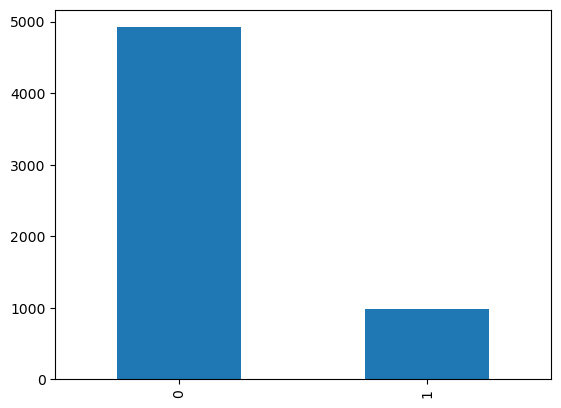

In [88]:
# Match distribution
train_data["match"].value_counts().plot(kind='bar')

As we can see, our data is imbalanced and thus we'll apply data augmentation using the random oversampling technique

In [89]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
 
# fit target and predictor variable
X_train , y_train = oversample.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampple dataset shape:', Counter(y_train))

Original dataset shape: Counter({0: 4921, 1: 4921})
Resampple dataset shape: Counter({0: 4921, 1: 4921})


In [90]:
# display unique label values' counts
y_train.value_counts()

0    4921
1    4921
Name: match, dtype: int64

<Axes: >

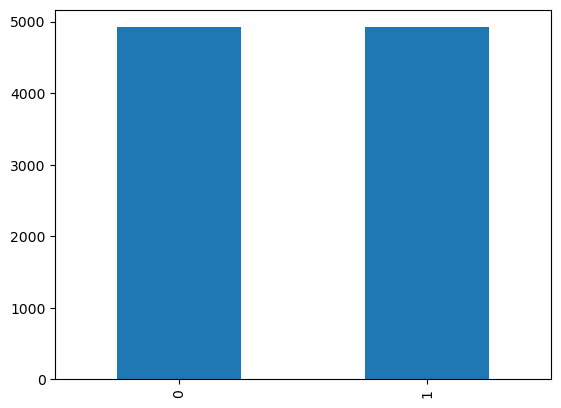

In [91]:
# Match distribution after oversampling
y_train.value_counts().plot(kind='bar')

In [92]:
# print information about the gender column
train_data['gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5909 entries, 0 to 5908
Series name: gender
Non-Null Count  Dtype
--------------  -----
5909 non-null   int64
dtypes: int64(1)
memory usage: 46.3 KB


In [93]:
# convert the datatype of gender from int to category in training and testing data 
train_data['gender'] = train_data['gender'].astype('category')
test_data['gender'] = test_data['gender'].astype('category')

In [94]:
# print information about the income column
train_data['income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5909 entries, 0 to 5908
Series name: income
Non-Null Count  Dtype 
--------------  ----- 
3047 non-null   object
dtypes: object(1)
memory usage: 46.3+ KB


In [95]:
# remove , from values in Feature (income) in training and testing set
train_data['income'] = train_data['income'].str.replace(',', '')
test_data['income'] = test_data['income'].str.replace(',', '')

In [96]:
# convert income column's datatype to float64
train_data['income'] = train_data['income'].astype('float64')
test_data['income'] = test_data['income'].astype('float64')

## check for duplicates

In [97]:
# print the same of duplicates
train_data.duplicated().sum()

0

There are no duplicates

## Convert objects to categorical values

In [98]:
# convert all object datatypes in training data to categorical values
X_train.loc[:, X_train.dtypes == 'object'] = X_train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

C:\Users\WIN 11\AppData\Local\Temp\ipykernel_19300\3742134259.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, X_train.dtypes == 'object'] = X_train.select_dtypes(['object']).apply(lambda x: x.astype('category'))


In [99]:
# display training data (without label) information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9842 entries, 0 to 9841
Columns: 126 entries, gender to amb5_2
dtypes: category(3), float64(115), int64(8)
memory usage: 9.3 MB


## Pipeline

In [100]:
# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the df2.info() output )
features_numeric = list(X_train.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(X_train.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['gender', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1

In [101]:
np.random.seed(42)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)


# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                                   'prob_o', 'met_o', 'age',
                                                   'field_cd', 'race', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['undergra', 'from',
                                                   'income'])])),
                ('my_classifier', RandomForestClassifier())])

In [102]:
# The pipeline object can be used like any sk-learn model
full_pipeline = full_pipeline.fit(X_train, y_train)
full_pipeline.predict(test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Parameters of Tuning Methods (Grid Search, Random Search, Bayisen Search) method are:

**estimator:** (object) a scikit-learn model.

**param_grid:** (dict or list of dictionaries) This enables searching over any sequence of parameter settings.

**scoring:** (str, callable, list, tuple or dict) Strategy to evaluate the performance of the cross-validated model on the test set.

**n_jobs:** (int) Number of jobs to run in parallel.

None denotes 1.
-1 denotes using all processors.

**refit:** (bool, str, or callable) Refit an estimator using the best found parameters on the whole dataset.

**cv:** (int, cross-validation generator or an iterable) determines the cross-validation splitting strategy. Possible inputs for cv are:

*None:* to use the default 5-fold cross validation.
*integer:* to specify the number of folds in a (Stratified)KFold.
*CV splitter.*
An iterable yielding (train, test) splits as arrays of indices.

**verbose:** (int) Controls the verbosity to show messages
<ol>
    <li>The computation time for each fold and parameter candidate is displayed.</li>
    <li>The score is also displayed.</li>
    <li>The fold and candidate parameter indexes are also displayed together with the starting time of the computation.</li>
</ol>

**error_score:** (‘raise’ or numeric) Value to assign to the score if an error occurs in estimator fitting.

## Grid Search

Grid search is the process of tuning hyperparameters to obtain the best values for a given model. The value of hyperparameters has a substantial impact on model performance. It calculates the performance for each combination of all the supplied hyperparameters and their values and chooses the optimal combination of hyperparameters. 

Based on the number of hyperparameters involved, this makes processing time-consuming and costly.

# Different Trials on Model Tuning

### Random Forest:

A random forest can efficiently handle huge datasets and perform both regression and classification tasks. It generates accurate predictions that are simple to understand. The random forest method outperforms the decision tree algorithm in terms of prediction accuracy.

The Random Forest classifier has a large number of hyperparameters that can be used to build a model. Some of these will be used to help us improve the model and score.

**The hyperparameters are:**
<ul>
    <li><b>n_estimators:</b>number of trees in the forest</li>
    <li><b>max_features:</b>maximum number of features considered for splitting a node</li>
    <li><b>max_depth:</b>maximum number of levels in each decision tree</li>
    <li><b>min_samples_split:</b>minimum number of data points placed in a node before the node is split</li>
    <li><b>min_samples_leaf:</b>minimum number of data points allowed in a leaf node</li>
    <li><b>objective:</b>Specify the learning task and the corresponding learning objective or a custom objective function to be used.</li>

</ul>

## Trial 1:

## Tuning Random Forest Hyperparameters using Grid Search with CV

#### Expectations:

In the 1st trial, we'll be using the Grid Search and Random Forest with validation set. I expect that it will give a good score because the model attempts all possible values to get the optimal values and fits the model to your training set.

#### Observations:

The best hyperparameters for this model will be:
    **max_depth** = 20,   **n_estimators** = 40  and   **imputer_strategy** = mean

producing the following scores:

<ul>
    <li>colab score: 0.99916</li>
    <li>private score: 0.8469</li>
    <li>public score: 0.84038</li>

</ul>

In [111]:
# our hyperparameter search space
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__n_estimators': [20, 30, 40],  
    'my_classifier__max_depth':[5, 10, 20]       
}

# cv=10 means 10-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipeline, param_grid, cv=10, verbose=3, n_jobs=-1, 
    scoring='roc_auc')

# fit the RF model to train it
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.99916366140978
best score {'my_classifier__max_depth': 20, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [112]:
# view results on test data
grid_search.predict_proba(test_data)[:,1]

array([0.30264342, 0.54487235, 0.21355644, ..., 0.11875   , 0.05      ,
       0.12628096])

In [113]:
# save prediction to csv file
submission = pd.DataFrame()

ts = pd.read_csv("test.csv")
submission['id'] = ts['id']

submission['match'] = grid_search.predict_proba(test_data)[:,1]

submission.to_csv('RFgd1_submission_walkthrough.csv', index=False)

# Trial 2:

**XGBoost:** Gradient Boosting Decision Trees (GBDT) is a decision tree ensemble learning algorithm that is similar to random forest. Ensemble learning algorithms combine different machine learning algorithms to produce a better model. Random forest is a method for constructing entire decision trees in parallel from random bootstrap samples of a data collection.

## Tuning XGBoost Hyperparameters using Grid Search with CV

#### Expectations:

In the 2nd trial, we'll be using the Grid Search and XGBoost with validation set. I expect that it will give a better score than that of the random forest because the XGBoost model whose parameters adjust itself iteratively so it will learn better from streaming data than one with a fixed set of parameters for the entire ensemble (Random Forest).

#### Observations:

The best hyperparameters for this model will be:
    **max_depth** = 20,   **n_estimators** = 40  and   **imputer_strategy** = mean

producing the following scores:

<ul>
    <li>colab score: 0.99831</li>
    <li>private score: 0.88731</li>
    <li>public score: 0.88505</li>

</ul>

In [50]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
xgb_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(objective='binary:logistic', 
                         silent=True, 
                         random_state= 42)
        )
    ]
)
xgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'p

In [51]:
xgb_pipeline = xgb_pipeline.fit(X_train, y_train)
# xgb_pipeline.predict(test_data)
y_pred = xgb_pipeline.predict(test_data)
# Show unique and count values
pd.DataFrame(y_pred).value_counts()

[09:47:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



0    2087
1     382
dtype: int64

In [52]:
# This search space took too long so I gave it a second try in trial 4 
# but with a single value for each hyperparameter in which I switched between different values manually one at a time

# param_grid_XGB = {
#     'preprocessor__num__imputer__strategy': ['mean'],
#     'selector__k': [41, 50, 60], # for select features
#      'my_classifier__learning_rate' : [0.01, 0.02, 0.03, 0.1],
#     'my_classifier__n_estimators' : [1500, 2000, 3000],
#     'my_classifier__subsample': [0.6, 0.8, 0.9],
#     'my_classifier__colsample_bytree': [0.6, 0.7, 0.8],
# }

# cv=10 means 10-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_XGB = GridSearchCV(
    xgb_pipeline, param_grid, cv=10, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

# fit the XGBoost to train the model
grid_search_XGB.fit(X_train, y_train)

print('best score {}'.format(grid_search_XGB.best_score_))
print('best score {}'.format(grid_search_XGB.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[09:49:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

best score 0.9983179401903601
best score {'my_classifier__max_depth': 20, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [53]:
# Evaluate model using training set to check on the bias
y_pred_train = grid_search_XGB.predict(X_train)
y_pred = grid_search_XGB.predict(test_data)

In [54]:
# calculate f1 score on training set
print(f"roc_auc_score={roc_auc_score(y_train, y_pred_train,average='micro')}")

roc_auc_score=1.0


In [55]:
# save prediction to csv file
submission = pd.DataFrame()

submission['id'] = ts['id']

submission['match'] = grid_search.predict_proba(test_data)[:,1]

submission.to_csv('XGBgd1_submission_walkthrough.csv', index=False)

## Bayesian Search

Unlike grid and random search methods, which treat hyperparameter sets independently, Bayesian optimization is an informed search method, which means it learns from prior iterations. The user determines the number of trials in this strategy.
At the expense of minimizing the number of trials, Bayesian optimization requires more time for each iteration.

# Trial 3:

## Tuning XGBoost Hyperparameters using Bayesian Search with CV

#### Expectations

In the 3rd trial, we'll be using the Bayesian Search and XGBoost with validation set. Since the Bayesian optimization usually have better performance than the grid search given that it can tune more parameters on wider ranges of values, I expect that it will give a better score than that of the grid search.

#### Observations

The best hyperparameters for this model will be:
    **learning_rate** = 0.03,  **n_estimators** = 3000,  **imputer_strategy** = mean, **n_jobs** = 2 and **n_iter** = 10

producing the following scores:

<ul>
    <li>colab score: 0.998227</li>
    <li>private score: 0.88212</li>
    <li>public score: 0.88073</li>

</ul>

In [56]:
# hyperparameter search space
param_XGB = {
    'preprocessor__num__imputer__strategy': ['mean'],
     'my_classifier__learning_rate' : [0.01, 0.02, 0.03, 0.1],
    'my_classifier__n_estimators' : [1500, 2000, 3000]
}

In [57]:
Bayes_search = BayesSearchCV(xgb_pipeline, 
                            param_XGB, 
                            cv=10, 
                            verbose=1, 
                            n_jobs=2, 
                            n_iter=10, # number of Bayes trials
                            scoring='roc_auc')

Bayes_search.fit(X_train, y_train)

print('best score {}'.format(Bayes_search.best_score_))
print('best score {}'.format(Bayes_search.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[10:49:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

best score 0.9982277833217159
best score OrderedDict([('my_classifier__learning_rate', 0.03), ('my_classifier__n_estimators', 3000), ('preprocessor__num__imputer__strategy', 'mean')])


In [58]:
# Evaluate model using training set to check on the bias
y_pred_train = Bayes_search.predict(X_train)
y_pred = Bayes_search.predict(test_data)

In [59]:
# Evaluate model using training set to check on the bias
y_pred_train = Bayes_search.predict(X_train)
y_pred = Bayes_search.predict(test_data)

In [60]:
# calculate f1 score
print(f"roc_auc_score={roc_auc_score(y_train, y_pred_train,average='micro')}")

roc_auc_score=1.0


In [61]:
# save prediction to csv file
submission = pd.DataFrame()

submission['id'] = ts['id']

submission['match'] = Bayes_search.predict_proba(test_data)[:,1]

submission.to_csv('XGBBayes1_submission_walkthrough.csv', index=False)

# Trial 4:
let's try this one more time, but with a different pipeline and hyperparameters that we've tried changed one at a time to get faster results

## Tuning XGBoost Hyperparameters using Grid Search with CV

#### Expectations

In the 4th trial, we'll be using the grid Search and XGBoost with validation set on different basis than the first time. Since the grid search optimization performs exhaustive search to find the best solution, I believe it will give more accurate results than any other search method, so I expect that it could give a better score than all previous trials.

#### Observations

The best hyperparameters for this model will be:
    **learning_rate** = 0.01, **max_depth**: 20,  **n_estimators** = 40,  **imputer_strategy** = mean,    
    **scale_pos_weight** = 1, **n_iter** = 10  ,  **n_jobs** = 2       ,  **colsample_bytree** = 0.4,
    **subsample** = 0.8     , **objective** ='binary:logistic'         ,  **reg_alpha** = 0.2
    
producing the following scores:

<ul>
    <li>colab score: 0.99916</li>
    <li>private score: 0.8882</li>
    <li>public score: 0.88501</li>

</ul>

In [105]:
# SelectKBest use for Select features according to the k highest scores. mutual_info_classif utilize the mutual information.
from sklearn.feature_selection import SelectKBest, mutual_info_classif
np.random.seed(42)

#My_classifier
xgb = XGBClassifier(scale_pos_weight=1, 
                      colsample_bytree = 0.4,
                      learning_rate=0.01,
                      max_depth=7,
                      n_estimators=900,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      reg_alpha = 0.2,
                    )
# combine the preprocessor with the model as a full tunable pipeline
full_pipeline1 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(mutual_info_classif, k=125)), # best 125 features
        ('my_classifier', xgb)
    ]
)
full_pipeline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=900,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [163]:
# here we specify the search space
param_grid = {
     'preprocessor__num__imputer__strategy': ['mean'],
      'my_classifier__n_estimators': [400,600,900],     
       'my_classifier__max_depth':[6,8] ,
     
}
# cv=10 means ten-fold cross-validation

grid_search_XGB2 = GridSearchCV(
    full_pipeline1, param_grid, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search_XGB2.fit(X_train, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Lap

best score 0.99916366140978
best score {'my_classifier__max_depth': 20, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [164]:
submission = pd.DataFrame()

ts = pd.read_csv("test.csv")
submission['id'] = ts['id']

submission['match'] = grid_search_XGB2.predict_proba(test_data)[:,1]

submission.to_csv('XGgs2_submission_walkthrough.csv', index=False)

# Trial 5:

Let's try the previous XGBoost model with Random Search

## Tuning XGBoost Hyperparameters using Random Search with CV

#### Expectations

I expect the random search to give better results than that of the grid search since it can converge to the optimal solution faster; however, it is not as accurate as the grid search.

#### Observations

The best hyperparameters for this model will be:
    **max_depth** = 8, **n_estimators**: 600, **imputer_strategy** = mean,  **n_iter** = 3  ,  **n_jobs** = 2 

producing the following scores:

<ul>
    <li>colab score: 0.98405</li>
    <li>private score: 0.88749</li>
    <li>public score: 0.88585</li>

</ul>

In [106]:
# here we specify the search space
param_grid = {
     'preprocessor__num__imputer__strategy': ['mean'],
      'my_classifier__n_estimators': [400,600,900],     
       'my_classifier__max_depth':[6,7,8] ,
     
}

In [108]:
random_search_XGB2 = RandomizedSearchCV(
    full_pipeline1, param_grid, cv=2, verbose=1, n_jobs=2, n_iter=3,
    scoring='roc_auc')

random_search_XGB2.fit(X_train, y_train)

print('best score {}'.format(random_search_XGB2.best_score_))
print('best score {}'.format(random_search_XGB2.best_params_))

Fitting 2 folds for each of 3 candidates, totalling 6 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\ProgramDa

best score 0.9840517768241477
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 600, 'my_classifier__max_depth': 8}


In [57]:
submission = pd.DataFrame()

ts = pd.read_csv("test.csv")
submission['id'] = ts['id']

submission['match'] = random_search_XGB2.predict_proba(test_data)[:,1]

submission.to_csv('1sample_submission_walkthrough.csv', index=False)

# Trial 6:

## Tuning SVM Hyperparameters using Random Search with CV

#### Expectations

Since SVM is better than RF in predicting cognitive impairments and produces more accurate results than the RF, I expect the SVM to give a higher score than that of the random forest; however, definitely not the best score so I did not submit it to kaggle.

#### Observations

The best hyperparameters for this model will be:
    **kernel** = 'rbf', **gamma**: 0.1,  **degree** = 7,  **imputer_strategy** = mean, 
    **C** = 10        , **n_iter** = 10  ,  **n_jobs** = 2 

producing the following scores:

<ul>
    <li>colab score: 0.98494</li>
</ul>

In [43]:
# create SVM pipeline
SVC_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced',probability=True))
    ]
)
SVC_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'p

In [44]:
# here we specify the search space for the SVM model
SVC_pipeline_params = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'my_svc__C': [1, 10, 100, 1e3, 1e4, 1e5],
    'my_svc__gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'my_svc__degree': [1,2,3,4,5,6,7,8],
    'my_svc__kernel': ['rbf']
}

random_search_svm = RandomizedSearchCV(
    SVC_pipeline, SVC_pipeline_params, cv=2, verbose=1, n_jobs=2, n_iter=10,
    scoring='roc_auc')

random_search_svm.fit(X_train, y_train)

print('best score {}'.format(random_search_svm.best_score_))
print('best score {}'.format(random_search_svm.best_params_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
best score 0.9849499344241717
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_svc__kernel': 'rbf', 'my_svc__gamma': 0.1, 'my_svc__degree': 7, 'my_svc__C': 10}


#### Expectations

#### Observations

In [46]:
submission = pd.DataFrame()

ts = pd.read_csv("test.csv")
submission['id'] = ts['id']

submission['match'] = random_search_svm.predict_proba(test_data)[:,1]

submission.to_csv('SVM_rand11_submission_walkthrough.csv', index=False)

# Trial 7:

## Logistic Regression using Random Search

#### Expectations

I expect a high score because random search works better for lower dimensional data and fits the model on your training set.

#### Observations

The best hyperparameters for this model will be:
    **penalty** = L2, **max_iter**: 100,  **C** = 100.0,  **imputer_strategy** = mean, **n_jobs** = 2 

Since it gave an even lower score than the previous trials, I did not submit it to kaggle either.
producing the following scores:

<ul>
    <li>colab score: 0.90069</li>
</ul>

In [47]:
# create a pipeline for the logistic regression model
LR_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('LogisticRegression', LogisticRegression()
        )
    ]
)
LR_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'p

In [48]:
# here we specify the search space for the logistic regression model
LR_param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'LogisticRegression__penalty':['l1','l2'], 
    'LogisticRegression__C':[1,1e2, 1e3,1e5],  
    'LogisticRegression__max_iter':[100,1000,10000],     
}

In [49]:
random_search_LR = RandomizedSearchCV(LR_pipeline, 
                                      LR_param, 
                                      cv=2, 
                                      verbose=1, 
                                      n_jobs=2, 
                                      scoring='roc_auc')

random_search_LR.fit(X_train, y_train)

print('best score {}'.format(random_search_LR.best_score_))
print('best score {}'.format(random_search_LR.best_params_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
14 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, 

best score 0.9006907761072735
best score {'preprocessor__num__imputer__strategy': 'mean', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__max_iter': 100, 'LogisticRegression__C': 100.0}


C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# save score to csv submission file
submission = pd.DataFrame()

ts = pd.read_csv("test.csv")
submission['id'] = ts['id']

submission['match'] = random_search_LR.predict_proba(test_data)[:,1]

submission.to_csv('LR_rand11_submission_walkthrough.csv', index=False)

### Conclusion:  
The model that produced the highest score (a private score of 0.8882) is the one in Trial 4 which is the Grid Search and XGBoost Classifier with Cross Validation.

### Aaaaaaaaaand

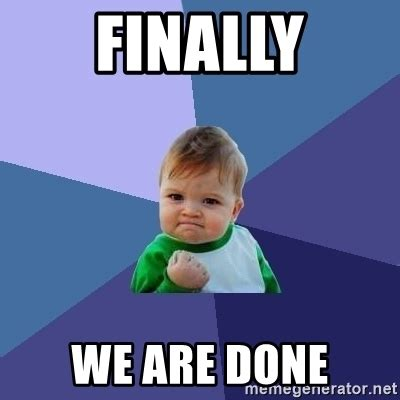